In [1]:
% matplotlib inline
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import Imputer

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
def guess_ages(df):
    for i in range(2):
        for j in range(1, 4):
            guess_df = df.loc[((df['Sex'] == i) &
                          (df['Pclass'] == j)), 'Age'].dropna()
            age_guess = guess_df.median()
            print(i, j, guess_df.count(), )
            
            
            df.loc[(df.Age.isnull()) & \
                     (df.Sex == i) & \
                     (df.Pclass == j), \
                    'Age'] = age_guess
    return df

In [5]:
def clean_data(df):
    df = df.loc[:,['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()
    df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
    df['Embarked'] = df['Embarked'].map({'C': 1, 'S': 2, 'Q': 3})
    df['Embarked'] = Imputer(axis=1, strategy='most_frequent').fit_transform(df.Embarked)[0].astype(int)
    df = guess_ages(df)
    return df
df = clean_data(train_df)
df.head()

0 1 85
0 2 74
0 3 102
1 1 101
1 2 99
1 3 253


/Users/oduvan/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [6]:
df['Survived'] = train_df['Survived']
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,1,1
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,1
4,3,1,35.0,0,0,8.0500,2,0


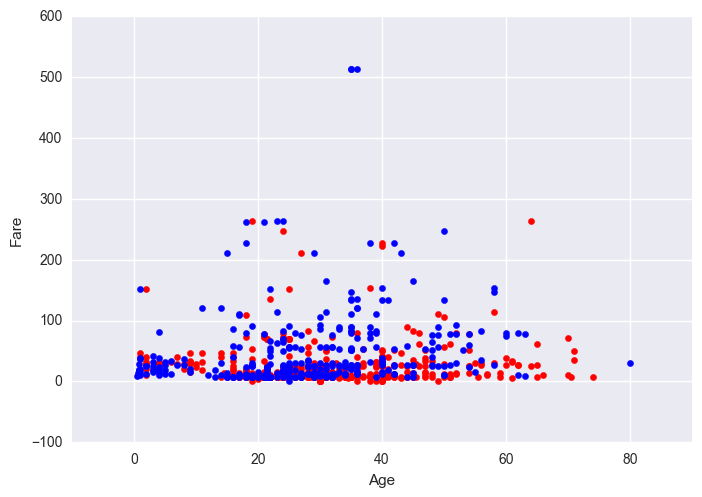

In [7]:
features = ['Age', 'Fare']

plt.scatter(df.loc[df.Survived==0, features[0]], df.loc[df.Survived==0, features[1]], label='die', color='red')
plt.scatter(df.loc[df.Survived==1, features[0]], df.loc[df.Survived==1, features[1]], label='live', color='blue')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()

In [8]:
aged_df = train_df[~train_df.Age.isnull()]

In [32]:
aged_df.loc[:, ['Embarked']]

,Embarked
0,S
1,C
2,S
3,S
4,S
6,S
7,S
8,S
9,C
10,S


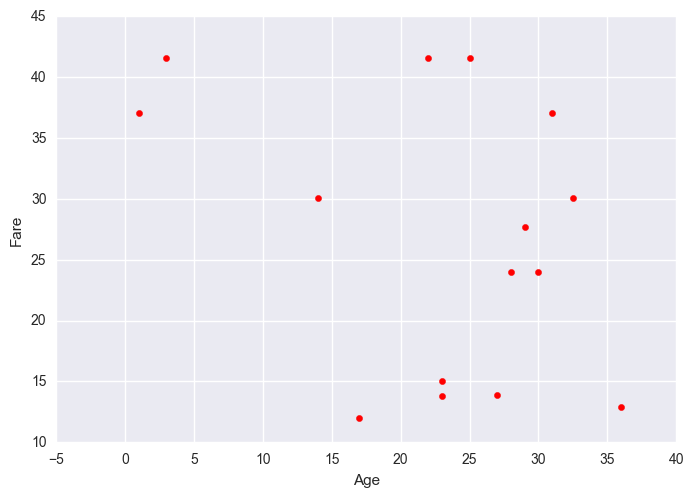

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C
135,136,0,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.8750,D,C
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C
608,609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,NaN,C


In [47]:
features = ['Age', 'Fare']

sub_aged_df = aged_df[(aged_df.Pclass == 2) & (aged_df.Embarked == 'C') & (aged_df.Fare < 100)]

plt.scatter(sub_aged_df.loc[:, features[0]], sub_aged_df.loc[:, features[1]], color='red')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()
sub_aged_df

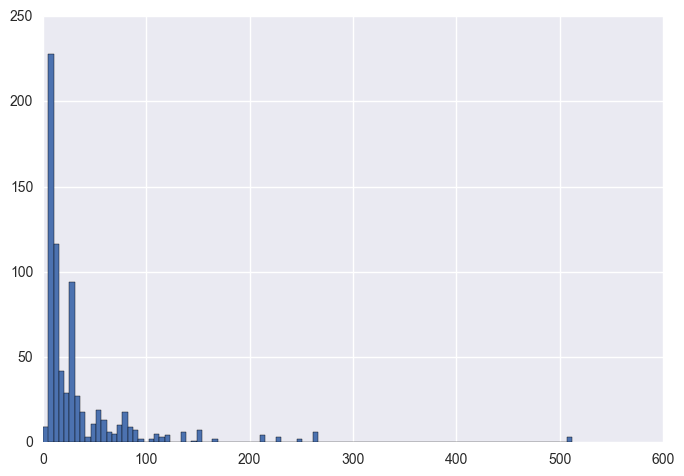

In [17]:
plt.hist(aged_df.loc[:, 'Fare'], bins=100)
plt.show()

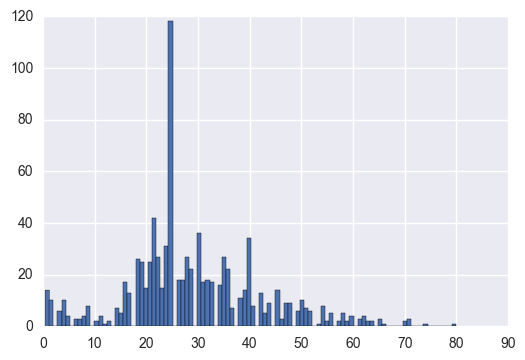

In [99]:
plt.hist(df.Age, bins=100)
plt.show()

In [90]:
train_df.loc[train_df.Age.isnull(), ['Pclass', 'Sex', 'PassengerId']].groupby(['Pclass', 'Sex']).count()

PassengerId
Pclass Sex                
1      female            9
       male             21
2      female            2
       male              9
3      female           42
       male             94

In [91]:
train_df.loc[~train_df.Age.isnull(), ['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex']).median()

Age
Pclass Sex         
1      female  35.0
       male    40.0
2      female  28.0
       male    30.0
3      female  21.5
       male    25.0

In [96]:
train_df.Age.count() / train_df.PassengerId.count()

0.80134680134680136

In [97]:
test_df.Age.count() / test_df.PassengerId.count()

0.79425837320574166

/Users/oduvan/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


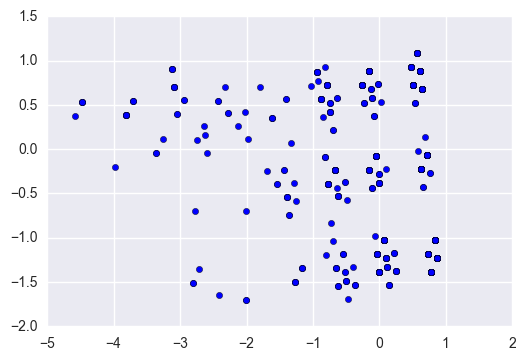

In [144]:
from sklearn.decomposition import PCA
els = clean_data(aged_df).loc[:,['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]
pca = PCA(n_components=2)
res = pca.fit_transform(els)
#pd.concat([els, pd.Series(res.T[0], index=els.index)], axis=1)
plt.scatter(res.T[0], res.T[1])

In [136]:
res.T[0]

array([ -1.63261928e-01,   1.51304746e-03,   5.03293737e-01,
        -3.28753972e-02,   6.05073974e-01,   8.37240741e-01,
        -2.32012951e+00,  -7.37097828e-01,  -1.14570336e-01,
        -8.85237947e-01,   7.35460504e-01,   6.05073974e-01,
        -3.26424084e+00,   5.03293737e-01,   6.19377121e-01,
        -3.12285386e+00,  -2.65042164e-01,   7.21157357e-01,
         7.21157357e-01,   4.68905293e-01,   8.37240741e-01,
        -2.42190975e+00,  -3.36602108e+00,  -2.70815853e+00,
         8.71629186e-01,   7.21157357e-01,   1.03293284e-01,
         6.89048393e-02,   6.05073974e-01,  -1.03337807e+00,
        -2.30653720e-01,  -2.65042164e-01,  -1.48958781e-01,
        -1.35496190e+00,   4.68905293e-01,  -2.65042164e-01,
        -3.08846542e+00,   6.05073974e-01,   1.51304746e-03,
        -1.48958781e-01,   2.51433403e-01,   6.19377121e-01,
         6.39462419e-01,  -1.38935035e+00,  -4.47699710e+00,
         6.39462419e-01,   7.35460504e-01,   6.89048393e-02,
        -2.94032530e+00,